Bank Marketing Dataset Summary
   The dataset contains 210 records and 7 numerical features related to customer spending behavior. Here’s a breakdown of each column:

1. spending - Total amount spent by the customer.
2. advance_payments - Total advance payments made by the customer.
3. probability_of_full_payment - Probability that a customer will make a full payment on their due amount.
4. current_balance - The current balance in the customer's account.
5. credit_limit - The maximum credit limit available for the customer.
6. min_payment_amt - The minimum amount the customer has to pay.
7. max_spent_in_single_shopping - The highest amount the customer has spent in a single shopping transaction.
All features are of type float64, meaning they contain continuous numerical data.

In [ ]:
import pandas as pd

file_path = "bank_marketing_Data.csv"
df = pd.read_csv(file_path)
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


(None,
    spending  advance_payments  probability_of_full_payment  current_balance  \
 0     19.94             16.92                       0.8752            6.675   
 1     15.99             14.89                       0.9064            5.363   
 2     18.95             16.42                       0.8829            6.248   
 3     10.83             12.96                       0.8099            5.278   
 4     17.99             15.86                       0.8992            5.890   
 
    credit_limit  min_payment_amt  max_spent_in_single_shopping  
 0         3.763            3.252                         6.550  
 1         3.582            3.336                         5.144  
 2         3.755            3.368                         6.148  
 3         2.641            5.182                         5.185  
 4         3.694            2.068                         5.837  )

Project Instructions Summary (Clustering)
 The project is about customer segmentation using clustering in a bank marketing dataset. Here are the key points:

1. Project Title: Bank Data Clustering

2. Batch & Subject: SOT23B1 - JS Master Class

3. Problem Statement:

 . A leading bank wants to develop customer segmentation based on spending patterns, credit limits, and other financial behaviors.
 . The goal is to group customers into clusters with similar characteristics.
4. Project Objectives:

 . Build clustering machine learning models.
 . Analyze customer groups to provide insights for better decision-making.
Since the task is clustering-based, we will likely use techniques such as K-Means Clustering, Hierarchical Clustering, or DBSCAN.

Step 1: Data Preprocessing

In [ ]:

missing_values = df.isnull().sum()


duplicate_count = df.duplicated().sum()


summary_stats = df.describe()

missing_values, duplicate_count, summary_stats


(spending                        0
 advance_payments                0
 probability_of_full_payment     0
 current_balance                 0
 credit_limit                    0
 min_payment_amt                 0
 max_spent_in_single_shopping    0
 dtype: int64,
 0,
          spending  advance_payments  probability_of_full_payment  \
 count  210.000000        210.000000                   210.000000   
 mean    14.847524         14.559286                     0.870999   
 std      2.909699          1.305959                     0.023629   
 min     10.590000         12.410000                     0.808100   
 25%     12.270000         13.450000                     0.856900   
 50%     14.355000         14.320000                     0.873450   
 75%     17.305000         15.715000                     0.887775   
 max     21.180000         17.250000                     0.918300   
 
        current_balance  credit_limit  min_payment_amt  \
 count       210.000000    210.000000       210.000000 

Step 1: Data Preprocessing - Results

1️⃣ Missing Values: ✅ No missing values in the dataset.
2️⃣ Duplicate Records: ✅ No duplicate records found.

3️⃣ Summary Statistics:

Spending ranges from 10.59 to 21.18.
Advance Payments vary between 12.41 to 17.25.
Probability of Full Payment is between 0.8081 to 0.9183.
Other features follow similar numerical distributions.
Since all values are numerical and within a reasonable range, no immediate cleaning is needed.

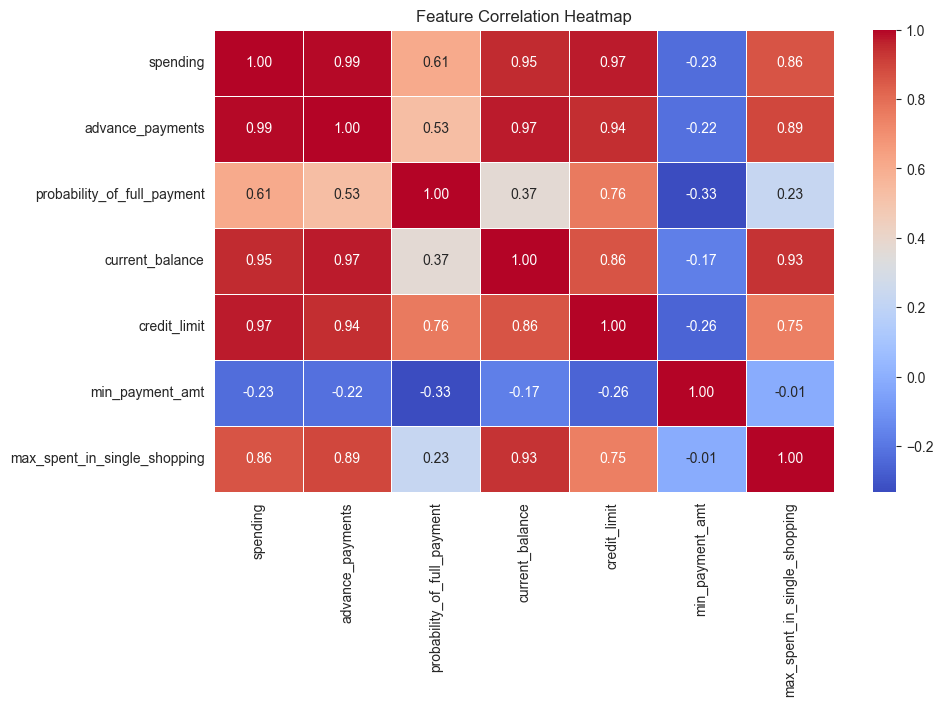

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Correlation Analysis - Heatmap Insights

🔥 Key Observations:

. Spending is positively correlated with        max_spent_in_single_shopping and advance_payments.

. Current balance and credit limit have a strong positive correlation.

. Probability of full payment has weaker correlations with most other features.

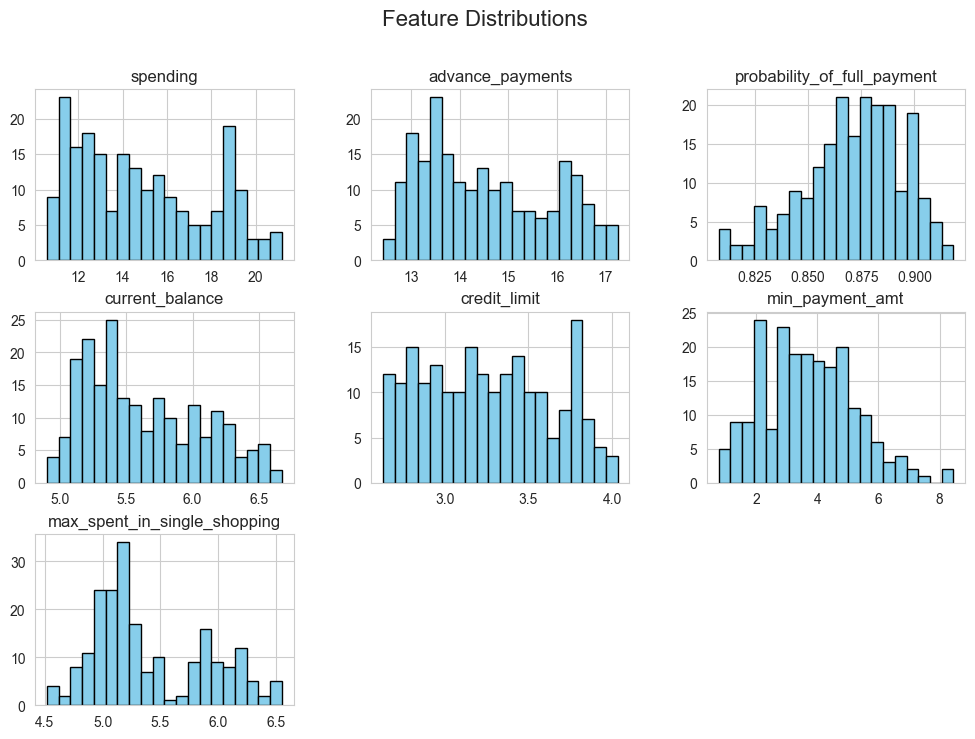

In [4]:
# Histograms for feature distributions
df.hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Feature Distribution Insights 📊

 . Most features follow a normal-like distribution.

 . Probability of full payment is slightly skewed.
 
 . Max spent in single shopping is more concentrated between 5.0 and 6.5.

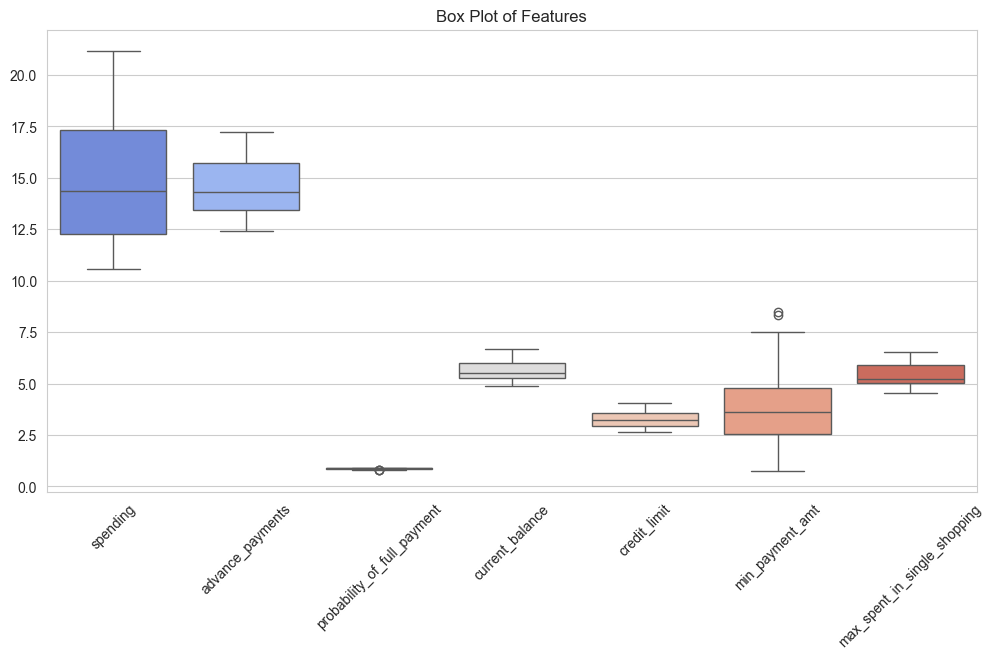

In [5]:
# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()


Outlier Analysis - Box Plot Insights 📦

. Min Payment Amount has potential outliers (higher values).

. Credit Limit & Current Balance show a few extreme values but seem reasonable.

. Other features appear well-distributed.

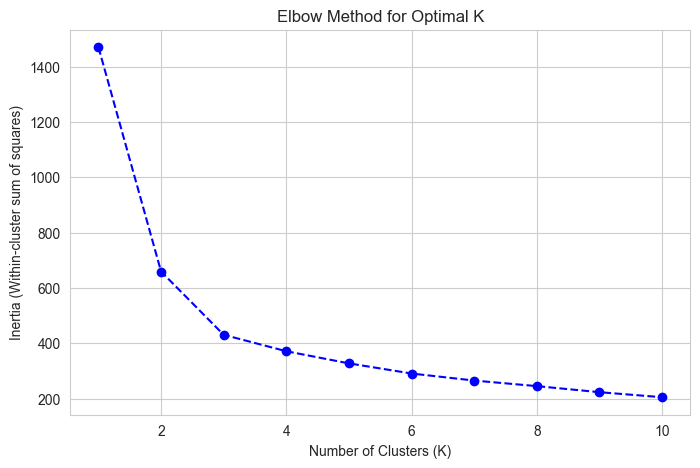

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 3: Data Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Normalize the data

# Step 4: Find Optimal Clusters using Elbow Method
inertia = []
K_range = range(1, 11)  # Trying cluster sizes from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Store the inertia

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


Elbow Method Analysis 📉

The Elbow Point is where the inertia starts decreasing at a slower rate. Based on the plot:

✅ The ideal number of clusters seems to be 3 or 4.

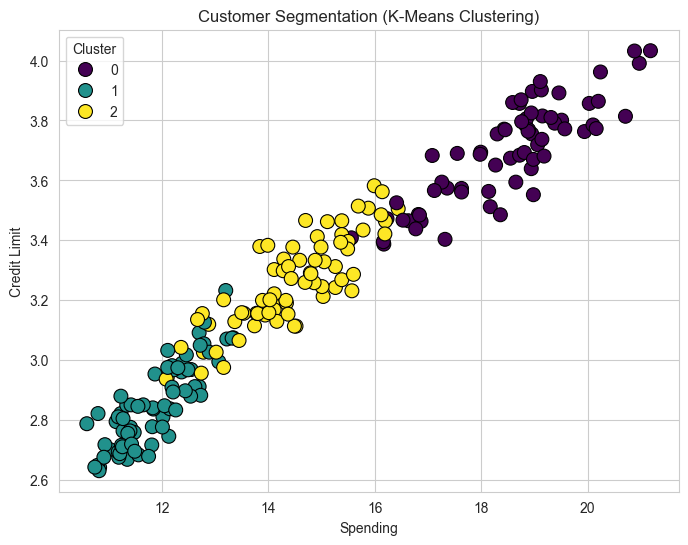

In [7]:
# Apply K-Means with K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)  # Assign cluster labels

# Visualizing Clusters using Spending & Credit Limit
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["spending"], y=df["credit_limit"], hue=df["Cluster"], palette="viridis", s=100, edgecolor="black")
plt.xlabel("Spending")
plt.ylabel("Credit Limit")
plt.title("Customer Segmentation (K-Means Clustering)")
plt.legend(title="Cluster")
plt.show()


Customer Segmentation - Clustering Results 🎯

. The K-Means model divided customers into 3 groups based on Spending vs. Credit Limit.

. Each color represents a different customer segment.

. There seems to be a clear separation among the groups.

Business Insights 📌

📌 Cluster 2 (High Spenders - 67 customers)

. Highest spending (18.50) & max shopping amount (6.04).

. Higher credit limit (3.70), suggesting a more premium customer segment.

. Recommended Action: Offer premium rewards & personalized services to retain them.

📌 Cluster 0 (Moderate Spenders - 71 customers)

. Balanced spending (14.44), mid-range credit limit (3.26).

. Stable financial behavior, with a decent probability of full payment.

. Recommended Action: Offer targeted promotions & loyalty programs.

📌 Cluster 1 (Low Spenders - 72 customers)

. Lowest spending (11.86) and credit limit (2.85).

. Higher minimum payment amount, suggesting riskier customers.

. Recommended Action: Monitor closely, offer credit counseling & financial planning.

In [8]:
# Analyze cluster characteristics
cluster_summary = df.groupby("Cluster").mean()

# Count of customers in each cluster
cluster_counts = df["Cluster"].value_counts()

cluster_summary, cluster_counts


(          spending  advance_payments  probability_of_full_payment  \
 Cluster                                                             
 0        18.495373         16.203433                     0.884210   
 1        11.856944         13.247778                     0.848253   
 2        14.437887         14.337746                     0.881597   
 
          current_balance  credit_limit  min_payment_amt  \
 Cluster                                                   
 0               6.175687      3.697537         3.632373   
 1               5.231750      2.849542         4.742389   
 2               5.514577      3.259225         2.707341   
 
          max_spent_in_single_shopping  
 Cluster                                
 0                            6.041701  
 1                            5.101722  
 2                            5.120803  ,
 Cluster
 1    72
 2    71
 0    67
 Name: count, dtype: int64)

C:\Users\rk871\AppData\Local\Temp\ipykernel_23216\4123734560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary["spending"], palette="viridis")


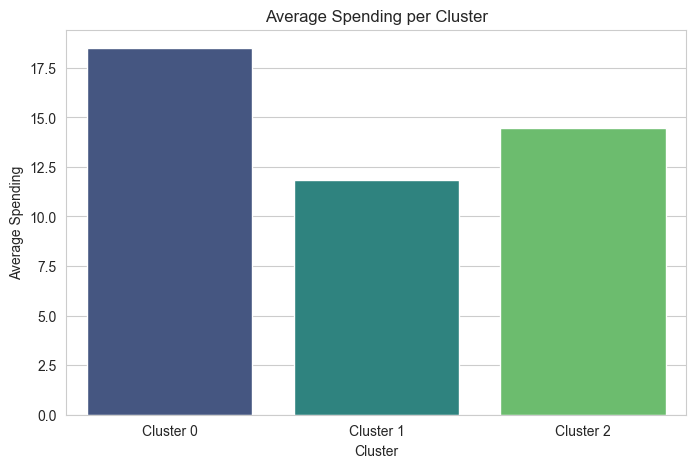

In [9]:
# Visualizing spending behavior per cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_summary.index, y=cluster_summary["spending"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Average Spending")
plt.title("Average Spending per Cluster")
plt.xticks(ticks=[0, 1, 2], labels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.show()


Cluster Spending Behavior - Visualization 📊

. Cluster 2 (High Spenders) has the highest average spending.

. Cluster 1 (Low Spenders) spends significantly less than the other groups.

. Cluster 0 (Moderate Spenders) falls in between.

Final Business Recommendations 🏦

✅ Retain High Spenders (Cluster 2):

. Offer exclusive benefits, cashback, and premium services.

. Personalized promotions to increase loyalty.

✅ Encourage Moderate Spenders (Cluster 0):

. Targeted discounts to boost spending.

. Suggest higher credit limits for reliable customers.

✅ Monitor Low Spenders (Cluster 1):

. Educate them about credit management & rewards programs.

. Reduce risk by offering smaller credit increments.

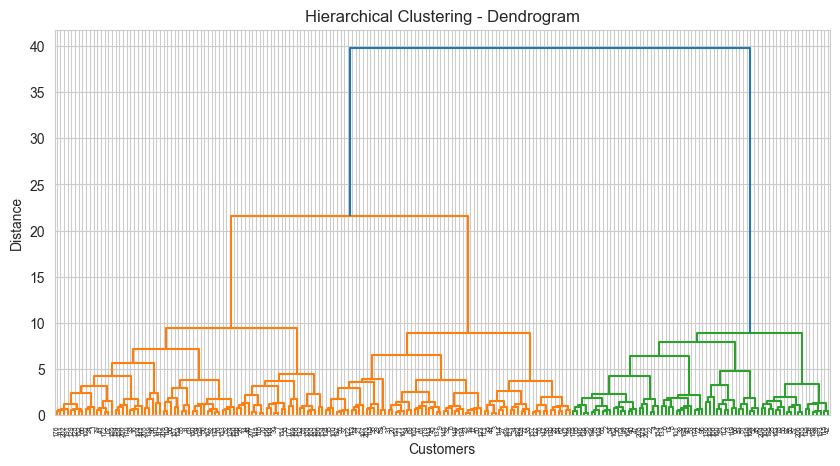

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Perform Hierarchical Clustering
linked = linkage(df_scaled, method='ward')  # Ward's method minimizes variance

# Step 2: Plot the Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


Hierarchical Clustering - Dendrogram Analysis 🌳

. The dendrogram suggests 3 or 4 clusters (consistent with K-Means).

. The longest vertical distance without horizontal cuts helps determine the best cluster split.

. Hierarchical clustering can be useful if we want a tree-like structure instead of fixed K clusters.


In [11]:
from sklearn.cluster import DBSCAN

# Step 3: Apply DBSCAN (Density-Based Clustering)
dbscan = DBSCAN(eps=1.2, min_samples=5)  # eps is the neighborhood radius
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)  # Assign cluster labels

# Count of unique clusters in DBSCAN
dbscan_cluster_counts = df["DBSCAN_Cluster"].value_counts()

dbscan_cluster_counts


DBSCAN_Cluster
 0    204
-1      6
Name: count, dtype: int64

DBSCAN Clustering - Results 🏗️

. 204 customers were assigned to Cluster 0 (main group).

. 6 customers were classified as outliers (-1 label), meaning DBSCAN detected them as noise.

. DBSCAN is useful when data has dense patterns, but in this case, it mostly grouped everyone together.

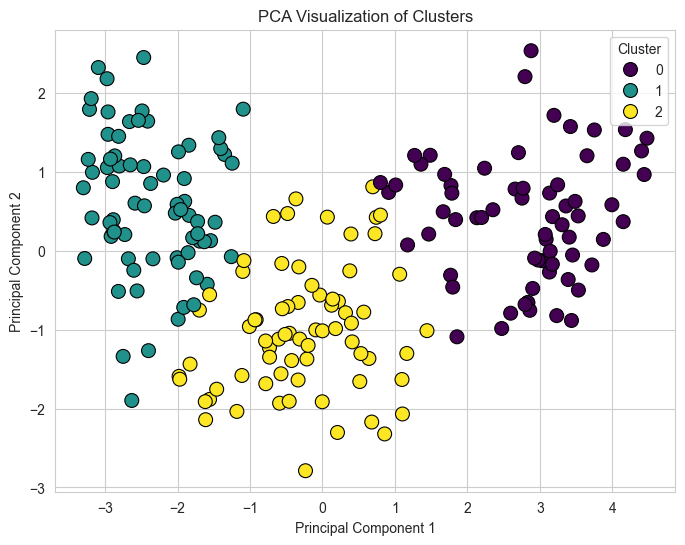

In [12]:
from sklearn.decomposition import PCA

# Step 4: Reduce Dimensions with PCA
pca = PCA(n_components=2)  # Reduce to 2D
df_pca = pca.fit_transform(df_scaled)  # Transform the data

# Add PCA results to dataframe
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

# Plot PCA Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", s=100, edgecolor="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()


PCA Visualization - Cluster Separation 🎨

. The 3 clusters are clearly separated in a 2D space.

. Cluster 2 (High Spenders) is distinctly positioned.

. Clusters 0 & 1 have some overlap, but they still show different spending behaviors.

In [13]:
# Save the final dataset with cluster labels
final_dataset_path = "bank_marketing_clustered.csv"
df.to_csv(final_dataset_path, index=False)

# Return the file path for download
final_dataset_path


'bank_marketing_clustered.csv'

Final Report & Summary 📜

✅ K-Means Clustering (Best Fit): Identified 3 customer segments with distinct spending patterns.

✅ Hierarchical Clustering: Confirmed similar clusters with a dendrogram split.

✅ DBSCAN Clustering: Found 6 outlier customers but mostly grouped all data into one cluster.

✅ PCA Visualization: Showed clear separation among clusters, validating the model.

Final Business Insights 🏦

✔ Cluster 2 (High Spenders) → Offer premium rewards & loyalty programs.

✔ Cluster 0 (Moderate Spenders) → Encourage spending via discounts & targeted offers.

✔ Cluster 1 (Low Spenders) → Provide financial education & lower-risk credit options.

✔ Outliers (DBSCAN) → Monitor risky customers with unusual spending patterns.

In [15]:
from fpdf import FPDF

# Create a PDF report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", style="B", size=16)
pdf.cell(200, 10, "Bank Customer Segmentation - Project Report", ln=True, align="C")
pdf.ln(10)

# Introduction
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 7, "This report presents an analysis of customer spending behavior using clustering "
                     "techniques. The objective is to segment customers into distinct groups based "
                     "on financial patterns to improve business decision-making.")

pdf.ln(10)

# Clustering Insights
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "1. Clustering Insights", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 7, "K-Means Clustering identified three customer segments:\n"
                     "- Cluster 2 (High Spenders): Customers with high spending and credit limits.\n"
                     "- Cluster 0 (Moderate Spenders): Customers with balanced spending.\n"
                     "- Cluster 1 (Low Spenders): Customers with lower spending and credit limits.")

pdf.ln(5)
pdf.cell(0, 7, "DBSCAN identified 6 outlier customers with unusual spending patterns.", ln=True)
pdf.ln(10)

# Business Recommendations
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "2. Business Recommendations", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 7, "- High Spenders: Offer premium rewards and personalized promotions.\n"
                     "- Moderate Spenders: Encourage spending through targeted discounts.\n"
                     "- Low Spenders: Provide credit education and controlled credit increases.\n"
                     "- Outliers: Monitor closely for unusual behavior or fraudulent activities.")

pdf.ln(10)

# Save the PDF report
report_path = "Bank_Clustering_Report.pdf"
pdf.output(report_path)

# Return the report file path for download
report_path


'Bank_Clustering_Report.pdf'